# Image Classification Dog or Cat Using CNN

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten 
import numpy as np
import matplotlib.pyplot as plt
import random

# Dataset

In [44]:
X_train = np.loadtxt('input.csv' , delimiter=',')
y_train = np.loadtxt('labels.csv' , delimiter=',')
X_test = np.loadtxt('input_test.csv' , delimiter=',')
y_test = np.loadtxt('labels_test.csv' , delimiter=',')

In [45]:
X_train.shape

(2000, 30000)

In [46]:
X_train = X_train.reshape(len(X_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
X_test =  X_test.reshape(len(X_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [47]:
print("Shape of X_Train:", X_train.shape)
print("Shape of X_Test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_Train: (2000, 100, 100, 3)
Shape of X_Test: (400, 100, 100, 3)
Shape of y_train: (2000, 1)
Shape of y_test: (400, 1)


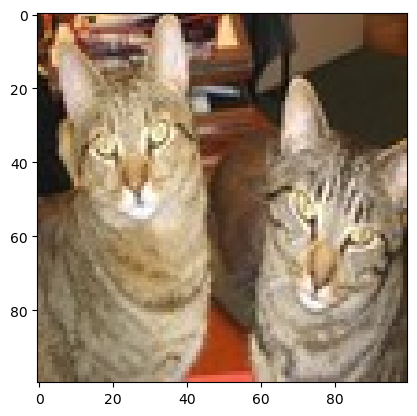

In [48]:
idx = random.randint(0 , len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model 

In [49]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32 , (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1 , activation='sigmoid')
    

])

In [50]:
# model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(X_train , y_train , epochs=5 , batch_size = 64)

Epoch 1/5
32/32 [==============================] - 14s 452ms/step - loss: 0.2786 - accuracy: 0.8835
Epoch 2/5
32/32 [==============================] - 12s 382ms/step - loss: 0.2296 - accuracy: 0.9130
Epoch 3/5
32/32 [==============================] - 13s 416ms/step - loss: 0.2006 - accuracy: 0.9290
Epoch 4/5
32/32 [==============================] - 12s 386ms/step - loss: 0.1652 - accuracy: 0.9470
Epoch 5/5
32/32 [==============================] - 11s 341ms/step - loss: 0.1337 - accuracy: 0.9610


In [60]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 1s 41ms/step - loss: 0.7801 - accuracy: 0.7050


[0.7800660729408264, 0.7049999833106995]

# Make Predictions

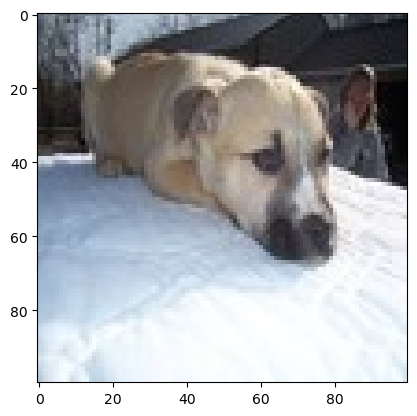

1/1 [==============================] - 0s 46ms/step
Our model says it is a : dog


In [87]:
idx2 = random.randint(0 , len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))

y_pred = y_pred > 0.5

if (y_pred == 0):
    pred = 'dog'
    
else:
    pred = 'cat'
    
print("Our model says it is a :",pred)